In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('student-data.csv')

In [3]:
data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [4]:
265 / 395. 

0.6708860759493671

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


## Convert all of the yes/no into 1 and 0

In [6]:
def to_bool(val):
    if val == 'yes':
        return 1
    elif val == 'no':
        return 0
    else:
        return None
    
yes_nos = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
           'internet', 'romantic', 'passed']

data1 = data.drop(yes_nos, axis=1).join(data[yes_nos].applymap(to_bool))
data1.head()
    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,6,1,0,0,0,1,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,4,0,1,0,0,0,1,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,4,3,2,2,3,3,10,1,0,1,0,1,1,1,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,3,2,2,1,1,5,2,0,1,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,4,3,2,1,2,5,4,0,1,1,0,1,1,0,0,1


## List the features that have any null values:

In [7]:
features_with_nulls = {k:v for k, v in data.isnull().apply(sum).to_dict().items() if v > 0}
features_with_nulls

{}

## Make barcharts that show the pass/fail distribution for each feature's values

['school', 'sex', 'age']
['address', 'famsize', 'Pstatus']
['Medu', 'Fedu', 'Mjob']
['Fjob', 'reason', 'guardian']
['traveltime', 'studytime', 'failures']
['famrel', 'freetime', 'goout']
['Dalc', 'Walc', 'health']
['absences', 'schoolsup', 'famsup']
['paid', 'activities', 'nursery']
['higher', 'internet', 'romantic']


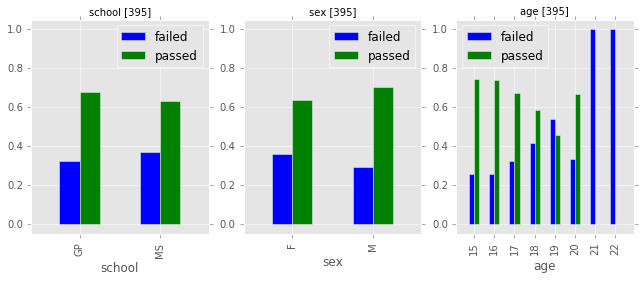

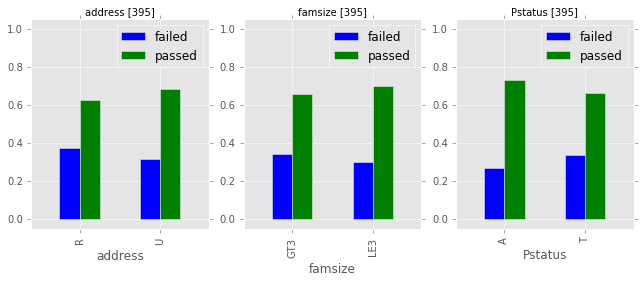

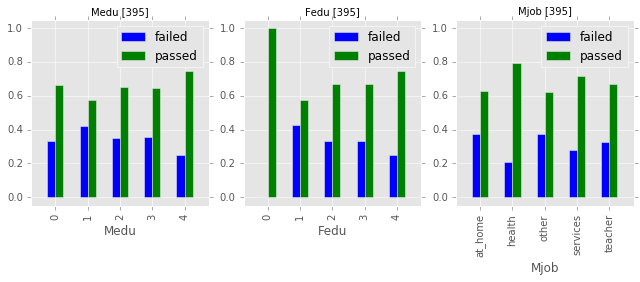

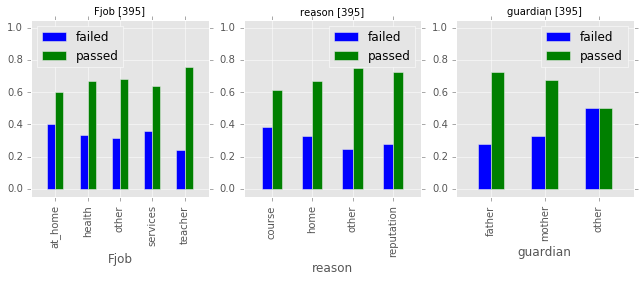

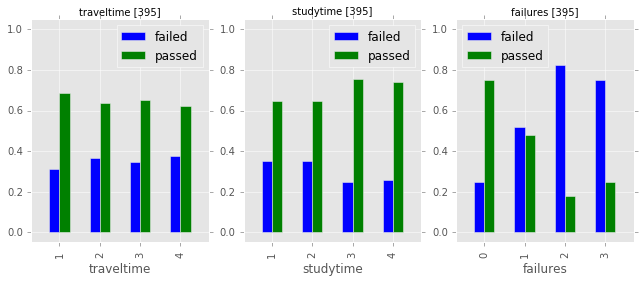

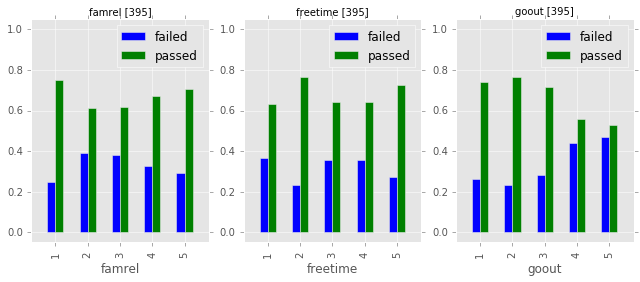

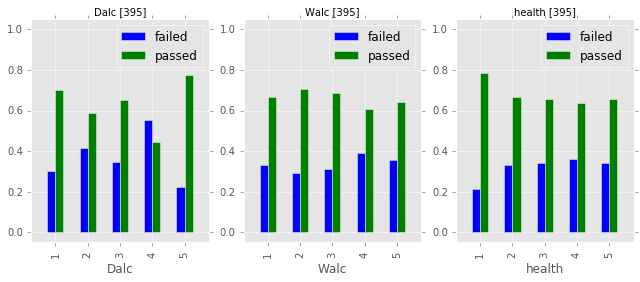

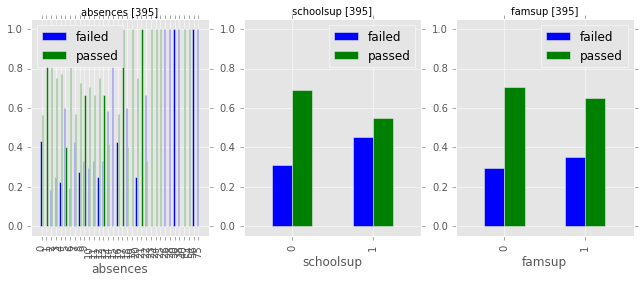

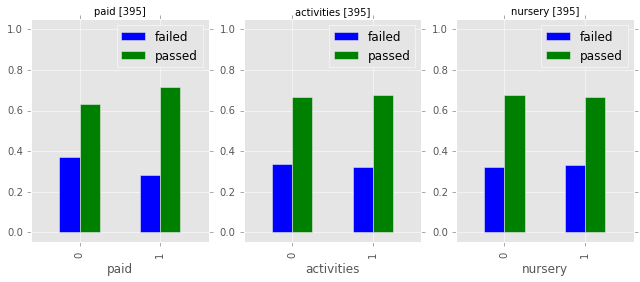

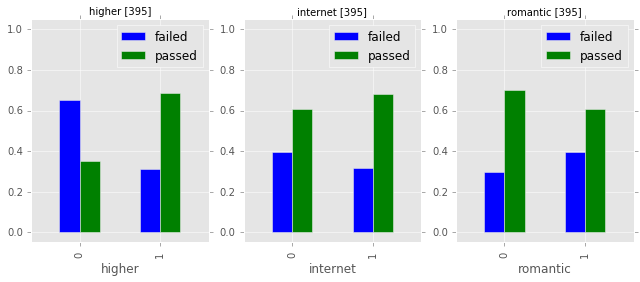

In [8]:
def loosen_limits(ax, which='x'):
    if which == 'x' or which == 'xy':
        x0, x1 = ax.get_xlim()
        xr = x1 - x0
        ax.set_xlim(x0 - 0.05 *xr, x1 + 0.05 * xr)
    elif  which == 'y' or which == 'xy':
        y0, y1 = ax.get_ylim()
        yr = y1 - y0
        ax.set_ylim(y0 - 0.05 *yr, y1 + 0.05 * yr)

import itertools    
        
def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.izip_longest(fillvalue=fillvalue, *args)
    
def make_hist(df, cols, ylog=False):
    
    xsize = 3
    
    for gg, group_cols in enumerate(grouper(xsize, cols, fillvalue=None)):
        
        group_cols = [c for c in group_cols if c is not None]
        print(group_cols)
    
    
        fig, axes = plt.subplots(1, len(group_cols), figsize=(3.*len(group_cols), 4.))

        for cc, col in enumerate(group_cols):
            ax = axes.flat[cc]

            try:
                if len(df[col].unique()) < 50:
                    
                    df[[col, 'passed']].groupby(col)['passed'].agg(
                       {
                            'passed': lambda x: float(sum(x))/float(len(x)),
                            'failed': lambda x: 1.-float(sum(x))/float(len(x))
                        }
                    ).plot(ax=ax, kind='bar', stacked=False)
                    
                    loosen_limits(ax)
                else:
                    print("Skipped: ", col)

                ax.set_title("{} [{:d}]".format(col, df[col].count()), fontsize=10)
                ax.set_ylim(-0.05, 1.05)
            except:
                print(col)
                raise

        fig.tight_layout()
        
        fig.savefig("figures/hist{:d}.png".format(gg))
        
cols = list(data1.columns)
cols.remove('passed')
make_hist(data1, cols)